
### Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements (in millions of square km) from the [National Snow & Ice Data Center](https://nsidc.org), provided in file "SeaIce.txt".

We perform the following processing steps:
1. Read and clean the data.
2. Calculate Sea Ice Extent (SIE) anomalies and visualize its temporal trend.
3. Compute the SIE temporal trend as a simple linear regression (OLS) and quantitatively evaluate it.
4. Estimate the sea ice extent for 2025.


### 1. Read and clean the data.
Load the monthly sea ice extent (SIE) monthly data from provided in the file 'SeaIce.txt'. Note variables ``extent`` (SIE) and ``area`` should be greater or equal than zero. Detect possible outliers and clean the data.  

In [50]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'SeaIce.txt'
data = pd.read_csv(file_path, delim_whitespace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       424 non-null    int64  
 1   mo         424 non-null    int64  
 2   data_type  424 non-null    object 
 3   region     424 non-null    object 
 4   extent     424 non-null    float64
 5   area       424 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 20.0+ KB


Estadísticos resumen para 'extent':
 count     424.000000
mean      -35.443066
std       686.736905
min     -9999.000000
25%         9.272500
50%        12.385000
75%        14.540000
max        16.450000
Name: extent, dtype: float64

Estadísticos resumen para 'area':
 count     424.000000
mean      -37.921108
std       686.566381
min     -9999.000000
25%         6.347500
50%         9.895000
75%        12.222500
max        13.840000
Name: area, dtype: float64

Diferencia entre la media y la mediana para 'extent': -47.828066037735866
Diferencia entre la media y la mediana para 'area': -47.81610849056602


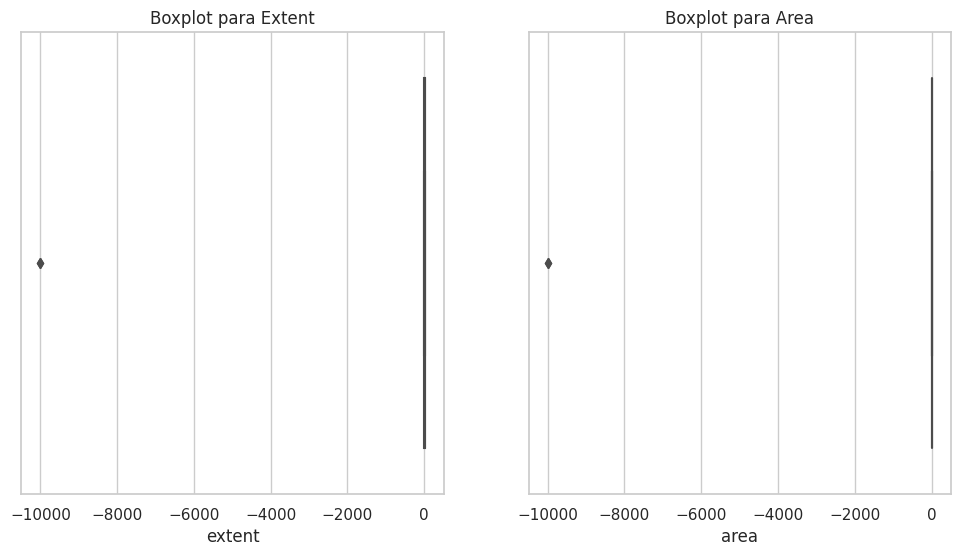

In [52]:
estadisticos_extent = data['extent'].describe()
estadisticos_area = data['area'].describe()

print("Estadísticos resumen para 'extent':\n", estadisticos_extent)
print("\nEstadísticos resumen para 'area':\n", estadisticos_area)

mean_median_dif_extent = data['extent'].mean() - data['extent'].median()
mean_median_dif_area = data['area'].mean() - data['area'].median()

print("\nDiferencia entre la media y la mediana para 'extent':", mean_median_dif_extent)
print("Diferencia entre la media y la mediana para 'area':", mean_median_dif_area)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='extent', data=data)
plt.title('Boxplot para Extent')

plt.subplot(1, 2, 2)
sns.boxplot(x='area', data=data)
plt.title('Boxplot para Area')

plt.show()

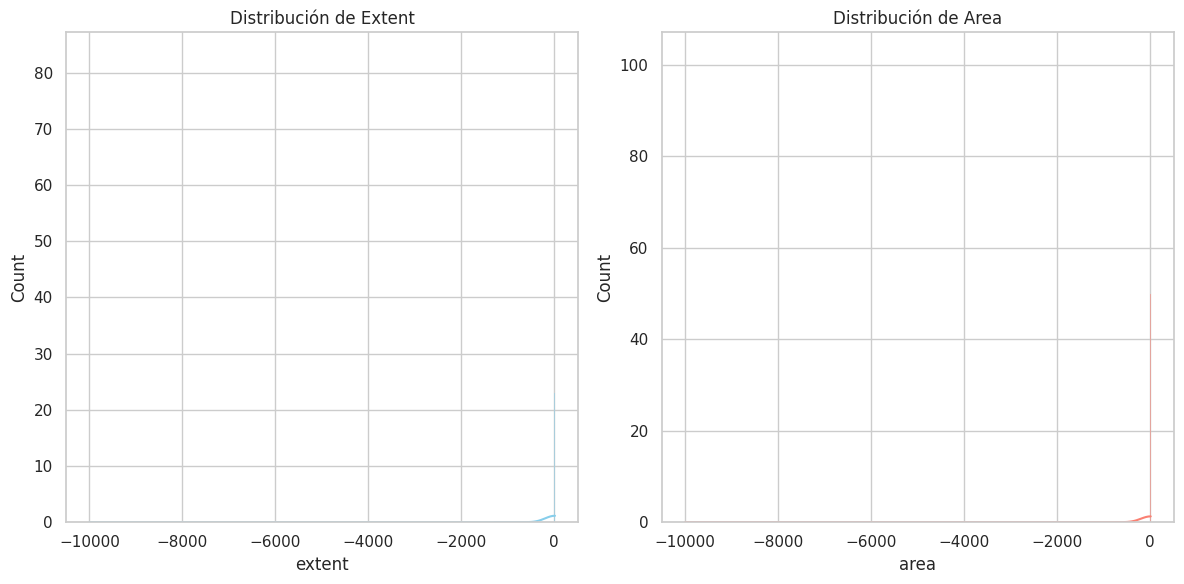

In [53]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['extent'], kde=True, color='skyblue')
plt.title('Distribución de Extent')

plt.subplot(1, 2, 2)
sns.histplot(data['area'], kde=True, color='salmon')
plt.title('Distribución de Area')

plt.tight_layout()
plt.show()

In [54]:
data = data[(data['extent'] >= 0) & (data['area'] >= 0)]

In [55]:
# En este paso se cacula el z score de las dos variables y se eliminan aquellas observaciones que estén por encima de 3 veces el z-score
z_scores = stats.zscore(data[['extent', 'area']])
threshold = 3
filtered_data = data[(z_scores < threshold).all(axis=1)]

Estadísticos resumen para 'extent':
 count    422.000000
mean      11.777583
std        3.120722
min        3.630000
25%        9.360000
50%       12.395000
75%       14.560000
max       16.450000
Name: extent, dtype: float64

Estadísticos resumen para 'area':
 count    422.000000
mean       9.287796
std        3.180044
min        2.150000
25%        6.382500
50%        9.990000
75%       12.227500
max       13.840000
Name: area, dtype: float64

Diferencia entre la media y la mediana para 'extent': -0.6174170616113752
Diferencia entre la media y la mediana para 'area': -0.702203791469195


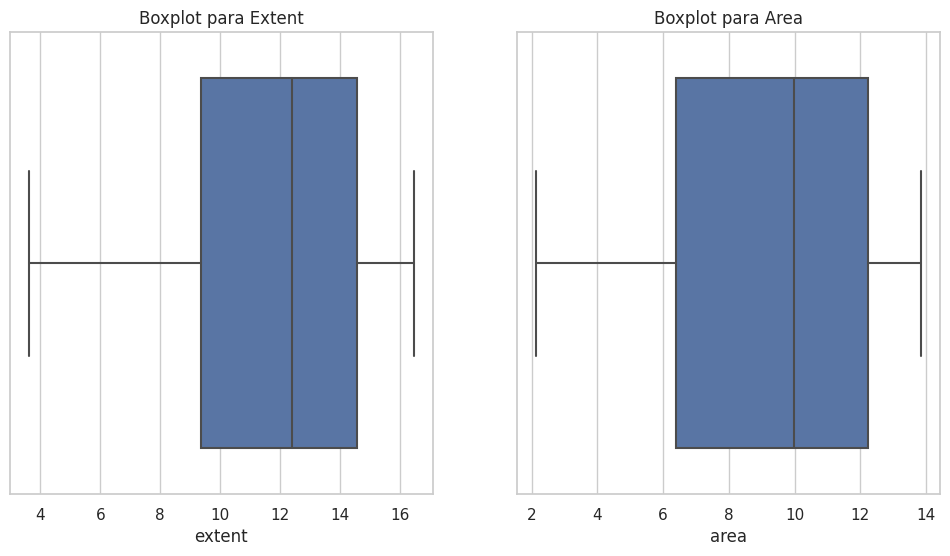

In [56]:
estadisticos_extent = filtered_data['extent'].describe()
estadisticos_area = filtered_data['area'].describe()

print("Estadísticos resumen para 'extent':\n", estadisticos_extent)
print("\nEstadísticos resumen para 'area':\n", estadisticos_area)

mean_median_dif_extent = filtered_data['extent'].mean() - filtered_data['extent'].median()
mean_median_dif_area = filtered_data['area'].mean() - filtered_data['area'].median()

print("\nDiferencia entre la media y la mediana para 'extent':", mean_median_dif_extent)
print("Diferencia entre la media y la mediana para 'area':", mean_median_dif_area)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='extent', data=filtered_data)
plt.title('Boxplot para Extent')

plt.subplot(1, 2, 2)
sns.boxplot(x='area', data=filtered_data)
plt.title('Boxplot para Area')

plt.show()

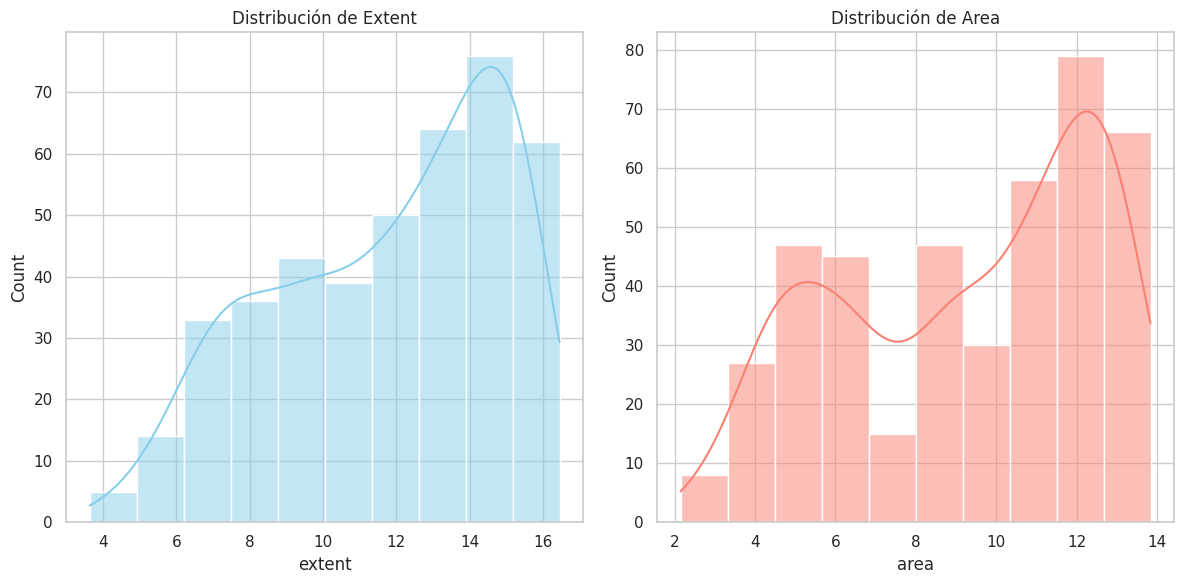

In [57]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['extent'], kde=True, color='skyblue')
plt.title('Distribución de Extent')

plt.subplot(1, 2, 2)
sns.histplot(filtered_data['area'], kde=True, color='salmon')
plt.title('Distribución de Area')

plt.tight_layout()
plt.show()

***Puede observarse como tras eliminar las observaciones negativas y eliminar aquellas observaciones con un z-score mayor a 3 veces este valor, tanto los boxplot, como las distirbuciones como los estadísticos de las variables se normalizan significativamente.***

### 2. Calculate SIE anomalies and visualize its temporal trend.

Visualize whether there is a monthly dependence of SIE, explore the linear relationship using ``lmplot``.
Compute the mean and variance of SIE for each month. ¿Which are the months with higher variance?

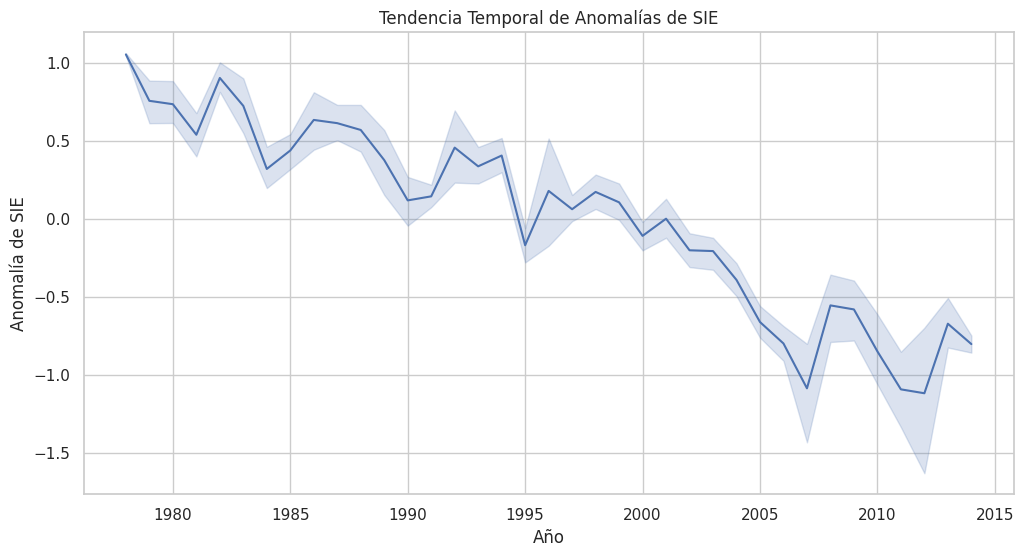

<Figure size 1200x600 with 0 Axes>

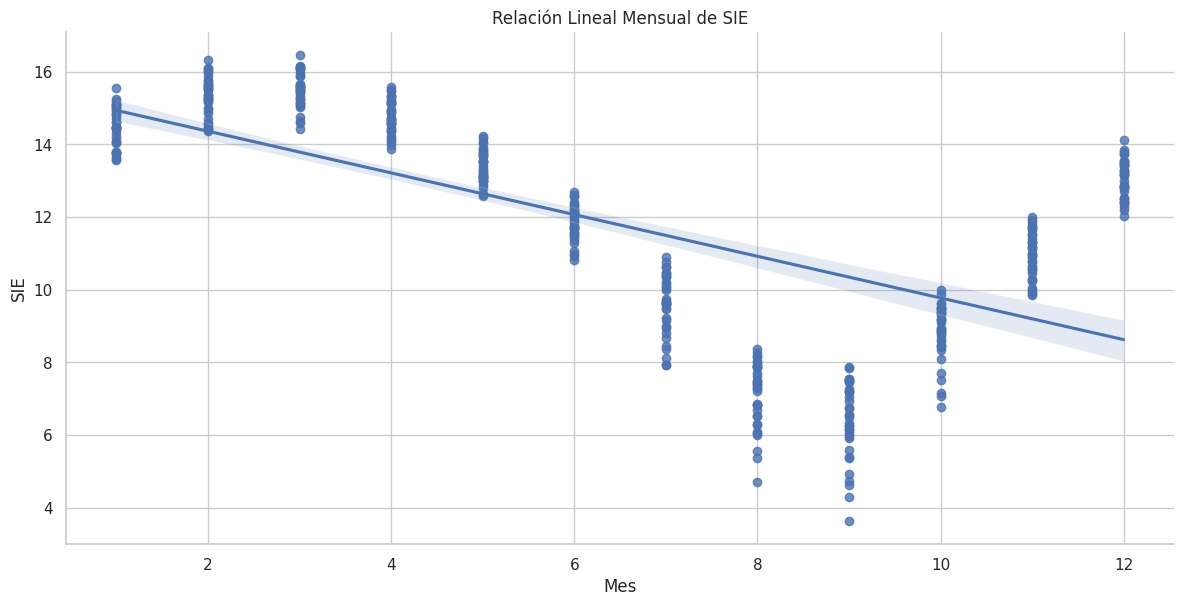


Media mensual de SIE:
 mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64

Varianza mensual de SIE:
 mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64

Mes con mayor varianza de SIE: 9


In [58]:
mean_sie = filtered_data.groupby('mo')['extent'].transform('mean')
filtered_data['sie_anomaly'] = filtered_data['extent'] - mean_sie

# Tendencia temporal anual anomalías SIE
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sie_anomaly', data=filtered_data)
plt.title('Tendencia Temporal de Anomalías de SIE')
plt.xlabel('Año')
plt.ylabel('Anomalía de SIE')
plt.show()

# Relación lineal mensual
plt.figure(figsize=(12, 6))
sns.lmplot(x='mo', y='extent', data=filtered_data, aspect=2, height=6)
plt.title('Relación Lineal Mensual de SIE')
plt.xlabel('Mes')
plt.ylabel('SIE')
plt.show()

media_sie_mensual = filtered_data.groupby('mo')['extent'].mean()
varianza_sie_mensual = filtered_data.groupby('mo')['extent'].var()

print("\nMedia mensual de SIE:\n", media_sie_mensual)
print("\nVarianza mensual de SIE:\n", varianza_sie_mensual)

max_var_month = varianza_sie_mensual.idxmax()
print("\nMes con mayor varianza de SIE:", max_var_month)

Calculate SIE anomalies as the difference between the extent for the month in question and the mean for that month based on the January 1981 to December 2010 data. Then convert it to percent difference by dividing it by the 1981-2010 average for that month and then multiplying by 100.

Example using June 2012:
The June mean extent, based on 1981 to 2010 data, is 11.89 million square km. This is the average of all the values in the extent column of the June Monthly Extent file from the 1981 to 2010 rows. The June 2012 anomaly is the difference between the extent value for June 2012 which is 10.92 million square km and the 1981-2010 June mean extent: 10.92 M sq km - 11.89 M sq km = -0.97 M sq km. The percent difference is then computed: (-0.97 / 11.89) X 100 = -8.16%.

Use the SIE anomaly for the rest of the exercise.

In [59]:
filtered_data_1981_2010 = filtered_data[(filtered_data['year'] >= 1981) & (filtered_data['year'] <= 2010)]

media_extent_1981_2010 = filtered_data_1981_2010.groupby('mo')['extent'].mean()

filtered_data['sie_anomaly_percent'] = ((filtered_data['extent'] - filtered_data.groupby('mo')['extent'].transform('mean')) / filtered_data.groupby('mo')['extent'].transform('mean')) * 100



Visualize the trend of SIE anomaly per year considering:1) all months, 2) January, 3) August

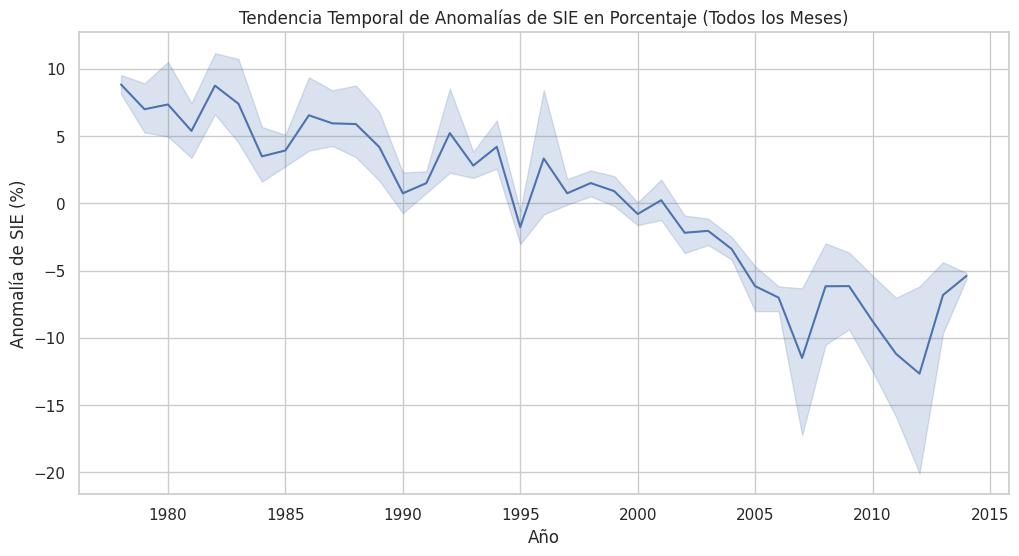

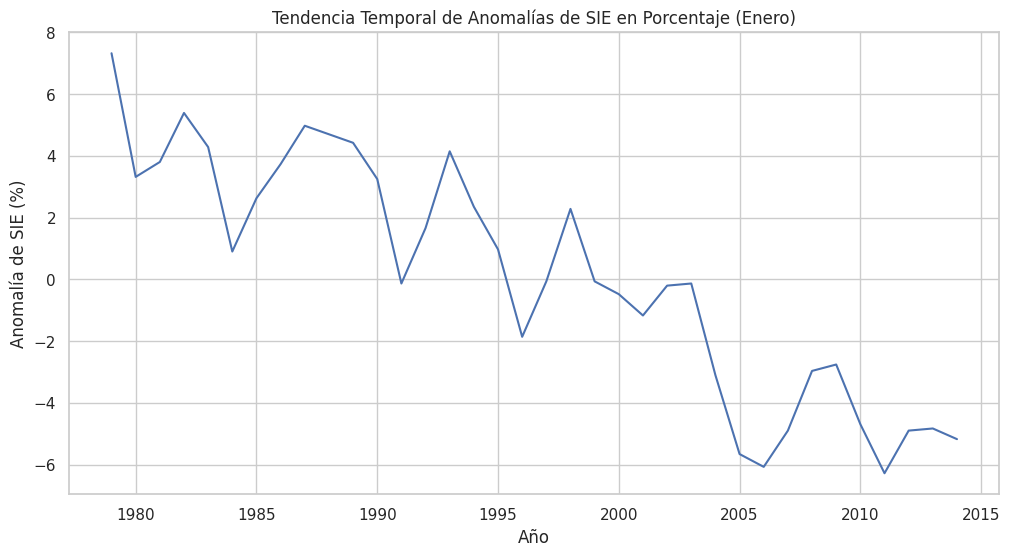

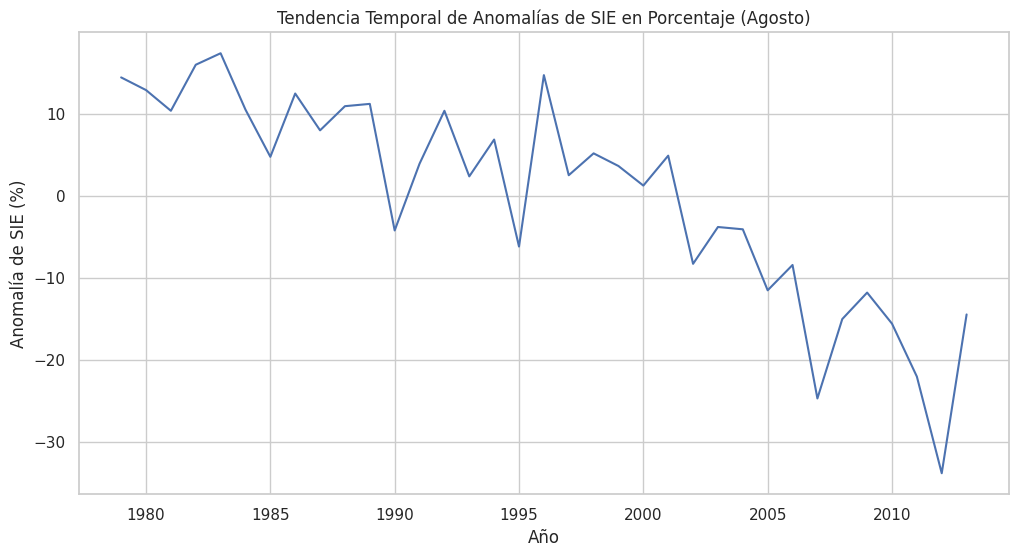

In [60]:
# Tendencia temporal de las anomalías de SIE en porcentaje para todos los meses
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sie_anomaly_percent', data=filtered_data)
plt.title('Tendencia Temporal de Anomalías de SIE en Porcentaje (Todos los Meses)')
plt.xlabel('Año')
plt.ylabel('Anomalía de SIE (%)')
plt.show()

# Tendencia temporal en Enero
filtered_data_january = filtered_data[filtered_data['mo'] == 1]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sie_anomaly_percent', data=filtered_data_january)
plt.title('Tendencia Temporal de Anomalías de SIE en Porcentaje (Enero)')
plt.xlabel('Año')
plt.ylabel('Anomalía de SIE (%)')
plt.show()

# Tendencia temporal en Agosto
filtered_data_august = filtered_data[filtered_data['mo'] == 8]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sie_anomaly_percent', data=filtered_data_august)
plt.title('Tendencia Temporal de Anomalías de SIE en Porcentaje (Agosto)')
plt.xlabel('Año')
plt.ylabel('Anomalía de SIE (%)')
plt.show()

### 3. Compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

Provide the estimated parameters for the linear regression.
Evaluate the quality of fit quantitatively and graphically.

                             OLS Regression Results                            
Dep. Variable:     sie_anomaly_percent   R-squared:                       0.512
Model:                             OLS   Adj. R-squared:                  0.511
Method:                  Least Squares   F-statistic:                     441.3
Date:                 Wed, 27 Dec 2023   Prob (F-statistic):           1.73e-67
Time:                         10:48:25   Log-Likelihood:                -1305.2
No. Observations:                  422   AIC:                             2614.
Df Residuals:                      420   BIC:                             2622.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1068.6546     50.874     21.00

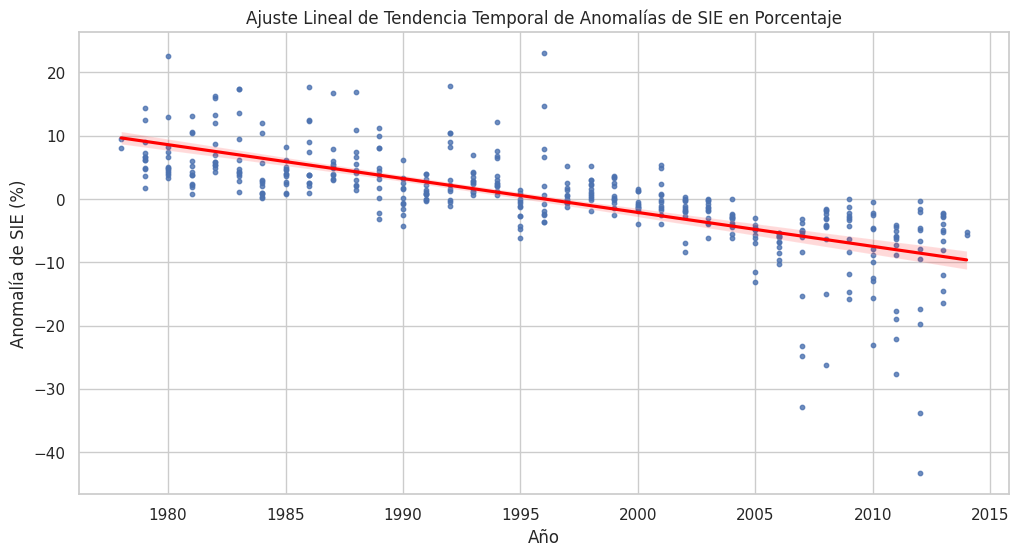

In [61]:
import statsmodels.api as sm

X = sm.add_constant(filtered_data['year'])
y = filtered_data['sie_anomaly_percent']

model = sm.OLS(y, X).fit()

print(model.summary())

# ajuste lineal
plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='sie_anomaly_percent', data=filtered_data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Ajuste Lineal de Tendencia Temporal de Anomalías de SIE en Porcentaje')
plt.xlabel('Año')
plt.ylabel('Anomalía de SIE (%)')
plt.show()

# Interpretación y conclusiones de la regresión:

## 1. **Coeficientes:**

- const (Intercepto): 1068.6546
- year (Pendiente): -0.5354

*Interpretación:*

El intercepto (const) es el valor esperado de sie_anomaly_percent cuando year es igual a cero. En este contexto, el intercepto no tiene una interpretación significativa, ya que un año de cero no tiene sentido en el contexto del problema.
La pendiente (year) indica la tasa de cambio en sie_anomaly_percent por cada año adicional. En este caso, el valor de la pendiente es -0.5354, lo que significa que se espera una disminución de aproximadamente 0.5354 en sie_anomaly_percent por cada año adicional.

## 2. **Estadísticas de Ajuste:**

- R-squared: 0.512
- Adj. R-squared: 0.511
- F-statistic: 441.3
- Prob (F-statistic): 1.73e-67

*Interpretación:*

R-squared representa la proporción de la variabilidad en sie_anomaly_percent que es explicada por la variable independiente year. En este caso, alrededor del 51.2% de la variabilidad en sie_anomaly_percent puede ser explicada por la variable year.
El valor de Prob (F-statistic) es muy pequeño (1.73e-67), lo que sugiere que la variable year es significativa en la predicción de sie_anomaly_percent.


En resumen, el modelo tiene un R-cuadrado moderado, sugiriendo que la variable year explica una parte significativa de la variabilidad en sie_anomaly_percent. Sin embargo, la normalidad de los residuos (Prob(Omnibus), kurtosis, asimetrías...) y algunas otras suposiciones del modelo pueden no cumplirse completamente. Además, los valores p indican que ambos coeficientes son significativos.

Based on your results, what is the trend in the evolution of sea ice extent over recent years?

Hint: the trend is typically expressed in percent per decade (multiply per 10)

In [62]:
intercept, slope = model.params

tendencia = slope * 10

print(f'La tendencia de la extensión de hielo por decada es de: {tendencia} ')



La tendencia de la extensión de hielo por decada es de: -5.353872854700624 


***La extensión del hielo marino está disminuyendo a una tasa de aproximadamente -5% por década. En otras palabras, la cantidad de hielo marino tiende a disminuir en alrededor del 5% cada década, según los datos analizados.***

### 4. Estimate the sea ice extent in the future

Based on the linear trend, make a prediction of SIE for October 2023, October 2025, and October 2030. Compare to September 1979 SIE to estimate the loss (in million square kilometers). For interpretation, note 3.59 million square kilometers is about twice the size of Alaska.

In [64]:
X = sm.add_constant(filtered_data['year'])
y = filtered_data['sie_anomaly_percent']

model = sm.OLS(y, X).fit()

años_pred = [2023, 2025, 2030]
future_X = pd.DataFrame({'const': [1] * len(años_pred), 'year': años_pred})
pred = model.predict(future_X)


#convertir las predicciones de porcentaje de anomalía de extensión de hielo marino (future_predictions)
#de nuevo a valores de extensión de hielo marino reales en millones de kilómetros cuadrados.
#Explicación de la fórmula:

#pred / 100: Divide las predicciones por 100 para convertirlas de porcentaje a fracción. Las predicciones se calcularon como porcentajes en el modelo de regresión.

#* media_79: Multiplica la fracción por la media de la extensión del hielo marino en septiembre de 1979. Esto es necesario para obtener la extensión del hielo marino en términos reales, ya que las predicciones eran en términos relativos.

#+ media_79: Suma la media de la extensión del hielo marino en septiembre de 1979. Esto se hace para ajustar las predicciones al nivel base de 1979.


media_79 = filtered_data[(filtered_data['year'] == 1979) & (filtered_data['mo'] == 9)]['extent'].mean()
sie_pred = media_79 + (pred / 100) * media_79

# Comparación de la perdida con 1979
september_79_extent = filtered_data[(filtered_data['year'] == 1979) & (filtered_data['mo'] == 9)]['extent'].mean()
loss = september_79_extent - sie_pred

# Mostrar los resultados
print("Predicciones de SIE para octubre de 2023, 2025 y 2030:")
for año, predic in zip(años_pred, sie_pred):
    print(f"Año {año}: {predic:.2f} millones de km^2")

print("\nPérdida estimada en millones de km^2 en comparación con septiembre de 1979:")
print(f"Pérdida total: {loss.sum():.2f} millones de km^2")

Predicciones de SIE para octubre de 2023, 2025 y 2030:
Año 2023: 6.16 millones de km^2
Año 2025: 6.08 millones de km^2
Año 2030: 5.89 millones de km^2

Pérdida estimada en millones de km^2 en comparación con septiembre de 1979:
Pérdida total: 3.46 millones de km^2


La pérdida total en comparación con septiembre del año 79 es de 3.46 km^2 que corresponde a prácticamente el doble del tamaño de Alaska.